## Лабораторная работа №3
### Группа ИУ5-22М
### Щипицина К.В.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
data = pd.read_csv("C:\\Users\\ksenv\\Desktop\\diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Нужно ли масштабирование
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Outcome', axis=1)

In [8]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [9]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Outcome'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((614, 8), (154, 8))

# 1. масштабирование признаков

### Масштабирование данных на основе Z-оценки

In [10]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [11]:
data_cs11_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [12]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

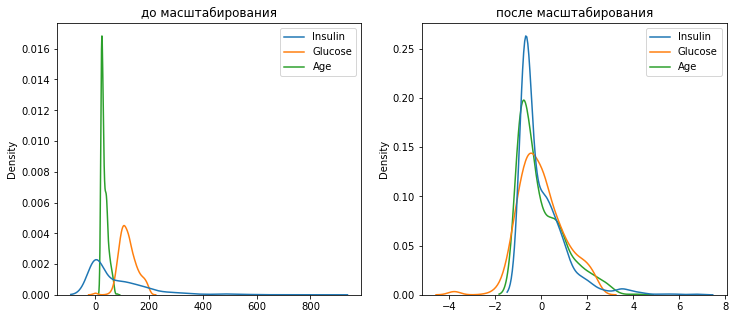

In [13]:
draw_kde(['Insulin', 'Glucose', 'Age'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [14]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [15]:
data_cs12_scaled_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,1.826263e-16,-1.451969e-16,-2.841556e-16,1.345287e-16,-1.160852e-16,1.718224e-16,1.432079e-16,2.882240e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.142255e+00,-3.833035e+00,-3.491513e+00,-1.250779e+00,-6.784740e-01,-4.175141e+00,-1.161115e+00,-1.042152e+00
25%,-8.468274e-01,-7.035708e-01,-3.479044e-01,-1.250779e+00,-6.784740e-01,-6.338193e-01,-6.711958e-01,-7.879280e-01
50%,-2.559728e-01,-1.345774e-01,1.591293e-01,1.375138e-01,-5.368317e-01,1.542306e-02,-3.127372e-01,-3.642218e-01
75%,6.303091e-01,6.240806e-01,5.647562e-01,7.685561e-01,3.945741e-01,5.958064e-01,4.057085e-01,6.526733e-01
max,3.289155e+00,2.425893e+00,2.694298e+00,4.996540e+00,6.583916e+00,4.625699e+00,5.702335e+00,3.279652e+00


In [16]:
data_cs12_scaled_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,-0.031525,-0.057193,0.061673,0.225204,0.032692,0.104765,0.123214,-0.024156
std,0.976646,1.051191,0.901239,1.012970,0.944682,1.157045,1.057540,0.982480
min,-1.142255,-3.833035,-3.491513,-1.250779,-0.678474,-4.175141,-1.179458,-1.042152
25%,-0.846827,-0.703571,-0.246498,-0.477752,-0.678474,-0.499380,-0.674253,-0.787928
50%,-0.255973,-0.102967,0.159129,0.389931,-0.232086,0.126909,-0.103318,-0.279481
75%,0.630309,0.497638,0.463350,0.942093,0.469688,0.808941,0.693851,0.631488
max,3.880009,2.457504,2.085857,2.724787,4.000016,3.615767,5.980541,4.042323


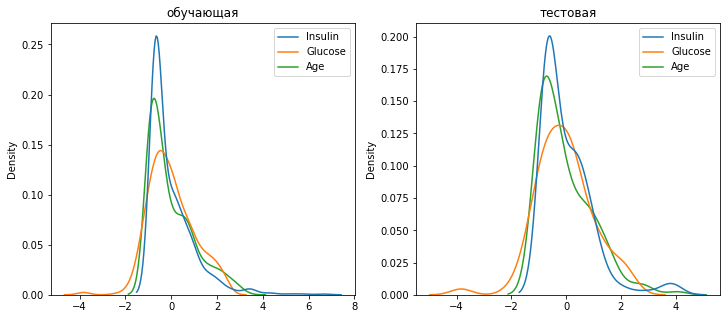

In [17]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Insulin', 'Glucose', 'Age'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование "Mean Normalisation"

In [18]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [19]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.001426,-0.001832,0.001999,0.007228,0.000903,0.002387,0.003600,-0.001121
std,0.224639,0.161478,0.158654,0.161134,0.136222,0.117499,0.147585,0.230593
min,-0.257763,-0.612411,-0.564439,-0.200211,-0.093423,-0.474403,-0.171846,-0.241138
25%,-0.191097,-0.112411,-0.056242,-0.200211,-0.093423,-0.067547,-0.098015,-0.182315
50%,-0.057763,-0.021502,0.025725,0.032113,-0.057371,0.002498,-0.040666,-0.084275
75%,0.142237,0.095923,0.091299,0.123022,0.056991,0.071052,0.072363,0.151019
max,0.875570,0.392640,0.435561,0.799789,0.906577,0.525597,0.871361,0.935332


In [20]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [21]:
data_cs22_scaled_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,4.339634e-18,-2.459126e-17,-4.152035e-17,2.201460e-17,-1.500790e-17,1.230580e-16,-3.015142e-17,5.126193e-17
std,2.258458e-01,1.599020e-01,1.617921e-01,1.601992e-01,1.378080e-01,1.137182e-01,1.458181e-01,2.315735e-01
min,-2.577633e-01,-6.124108e-01,-5.644390e-01,-2.002106e-01,-9.342297e-02,-4.744025e-01,-1.691736e-01,-2.411381e-01
25%,-1.910966e-01,-1.124108e-01,-5.624232e-02,-2.002106e-01,-9.342297e-02,-7.201804e-02,-9.779278e-02,-1.823146e-01
50%,-5.776330e-02,-2.150166e-02,2.572489e-02,2.201165e-02,-7.391942e-02,1.752453e-03,-4.556561e-02,-8.427540e-02
75%,1.422367e-01,9.971046e-02,9.129866e-02,1.230217e-01,5.433117e-02,6.769880e-02,5.911145e-02,1.510187e-01
max,7.422367e-01,3.875892e-01,4.355610e-01,7.997894e-01,9.065770e-01,5.255975e-01,8.308264e-01,7.588619e-01


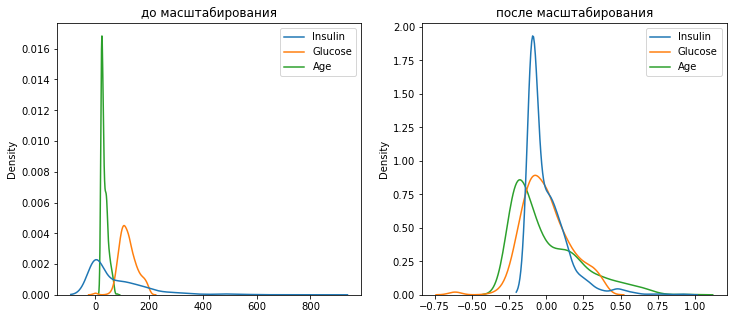

In [22]:
draw_kde(['Insulin', 'Glucose', 'Age'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

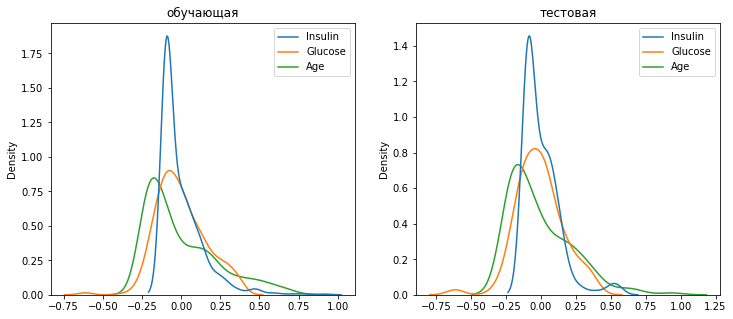

In [23]:
draw_kde(['Insulin', 'Glucose', 'Age'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax-масштабирование

In [24]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

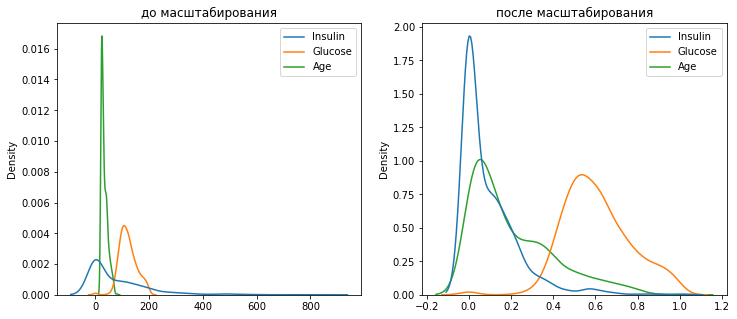

In [26]:
draw_kde(['Insulin', 'Glucose', 'Age'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

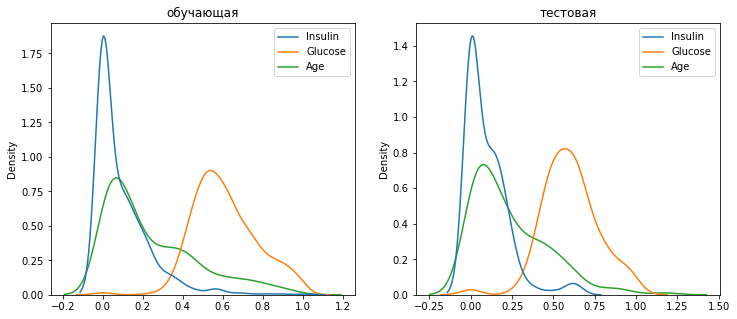

In [27]:
draw_kde(['Insulin', 'Glucose', 'Age'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

### Масштабирование по медиане
            

In [28]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.169010,0.094413,-0.160807,-0.076986,0.387422,-0.000798,0.259807,0.249464
std,0.673916,0.775094,1.075323,0.498507,0.905650,0.847759,0.866219,0.691778
min,-0.600000,-2.836364,-4.000000,-0.718750,-0.239686,-3.440860,-0.769935,-0.470588
25%,-0.400000,-0.436364,-0.555556,-0.718750,-0.239686,-0.505376,-0.336601,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.563636,0.444444,0.281250,0.760314,0.494624,0.663399,0.705882
max,2.800000,1.987879,2.777778,2.375000,6.408644,3.774194,5.352941,3.058824


In [29]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

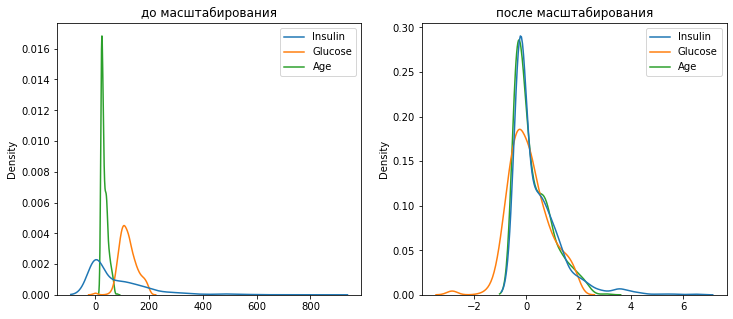

In [30]:
draw_kde(['Insulin', 'Glucose', 'Age'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

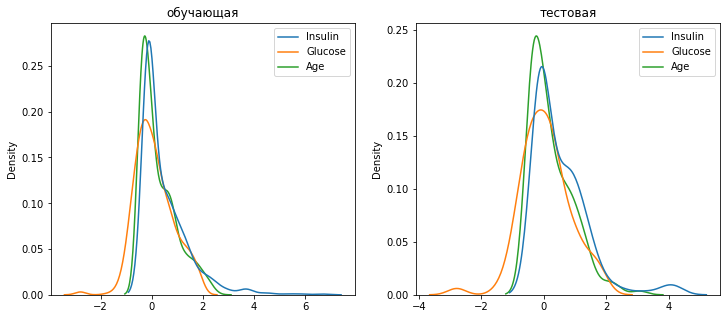

In [31]:
draw_kde(['Insulin', 'Glucose', 'Age'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

### Масштабирование по максимальному значению

In [32]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

### Обучение моделей с различными вариантами масштабирования признаков

In [34]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.1, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [36]:
clas_models_dict = {'LogR': LogisticRegression(max_iter=1000), 
                    'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    'Tree':DecisionTreeClassifier(),
                    'GB': GradientBoostingClassifier(),
                    'RF':RandomForestClassifier(n_estimators=50, random_state=1, max_depth=3)}

In [37]:
X_data_dict = {'Original': (X_train_df, X_test_df),
               'StandardScaler': (data_cs12_scaled_train, data_cs12_scaled_test), 
               'MeanNormalisation': (data_cs22_scaled_train, data_cs22_scaled_test),
               'MinMaxScaler': (data_cs32_scaled_train, data_cs32_scaled_test), 
               'RobustScaler': (data_cs42_scaled_train, data_cs42_scaled_test),
               'MaxAbsScaler': (data_cs52_scaled_train, data_cs52_scaled_test)
              }

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
def test_models(clas_models_dict, X_data_dict, y_train, y_test):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name, data_tuple in X_data_dict.items():

            X_train, X_test = data_tuple
              
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            auc = roc_auc_score(y_test, y_pred)
            logger.add(model_name, data_name, auc)
            
    return logger

In [39]:
%%time
logger = test_models(clas_models_dict, X_data_dict, y_train, y_test)

Wall time: 2.27 s


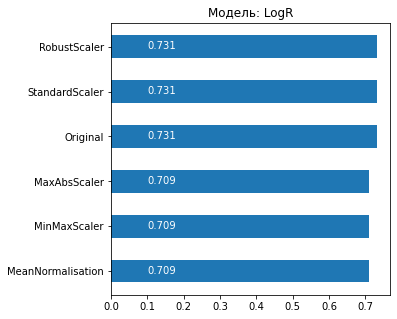

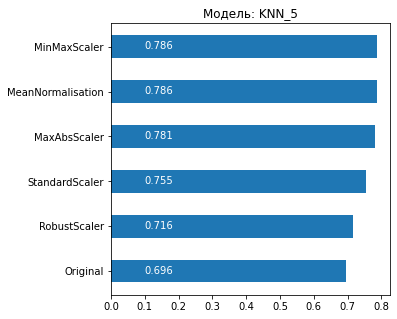

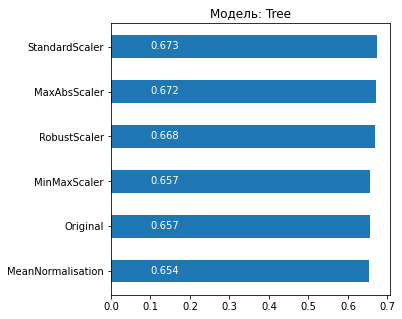

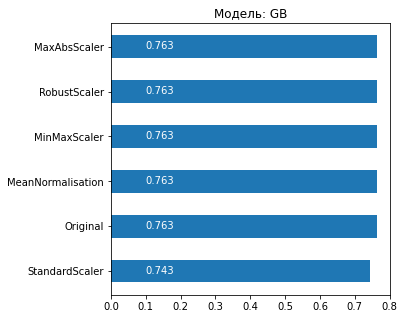

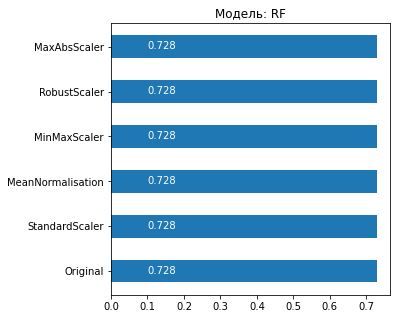

In [40]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model)

# 2. обработкa выбросов для числовых признаков 

In [41]:
import scipy.stats as stats

In [42]:
data = pd.read_csv("C:\\Users\\ksenv\\Desktop\\train (2).csv")

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data=data.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [47]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [48]:
Age, _,_ = impute_column(data, 'Age', 'most_frequent')
data['Age']=Age

In [49]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [50]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
x_col_list = ['Fare']

In [52]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

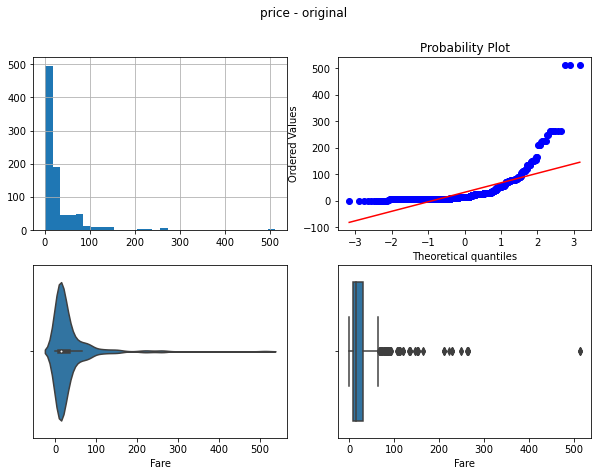

In [53]:
diagnostic_plots(data, 'Fare', 'price - original')

In [54]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [55]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

## Удаление выбросов

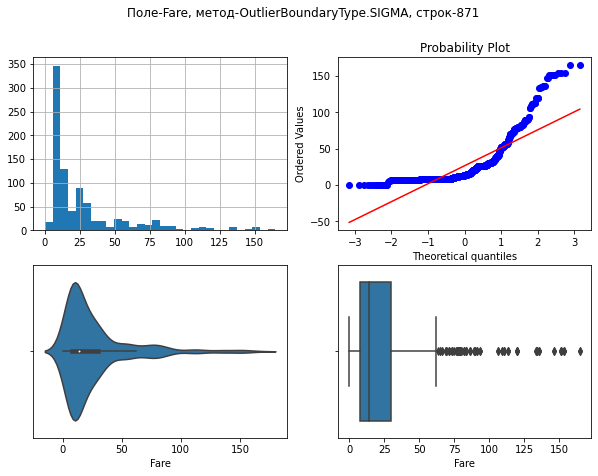

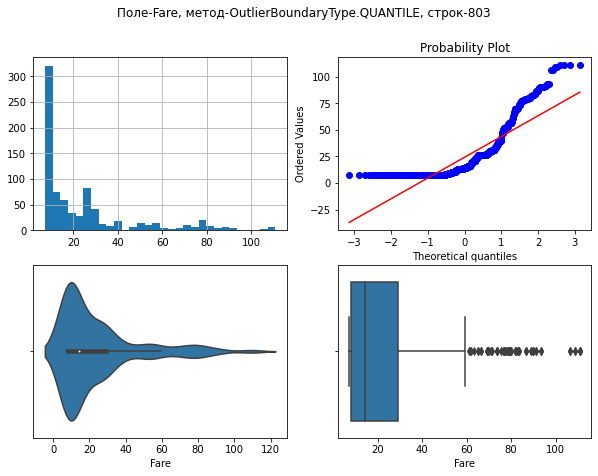

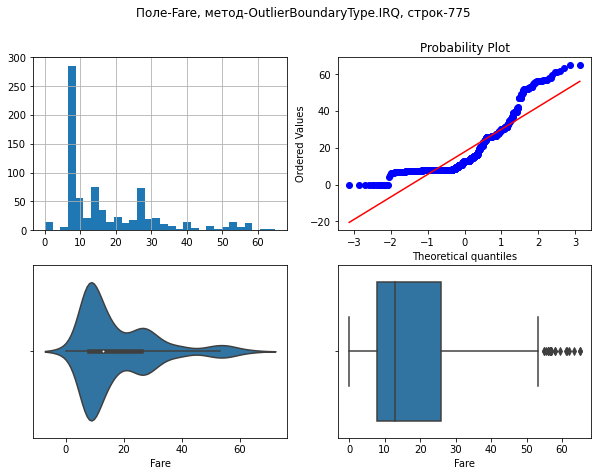

In [56]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

## Замена выбросов

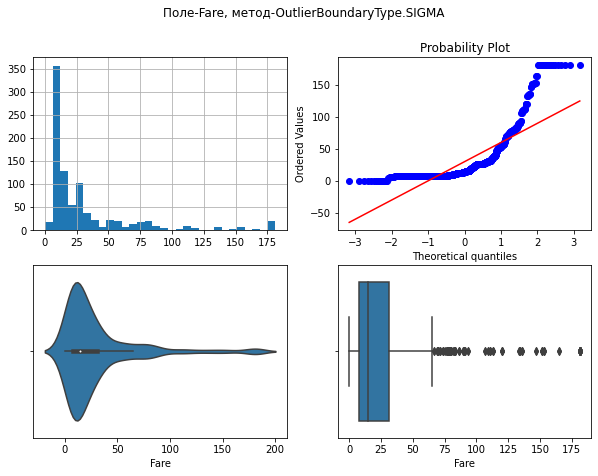

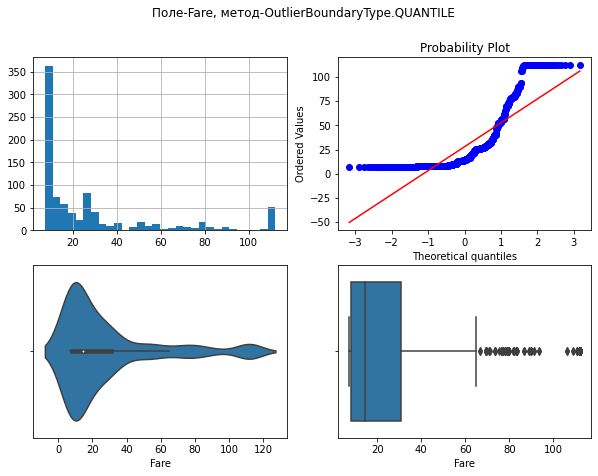

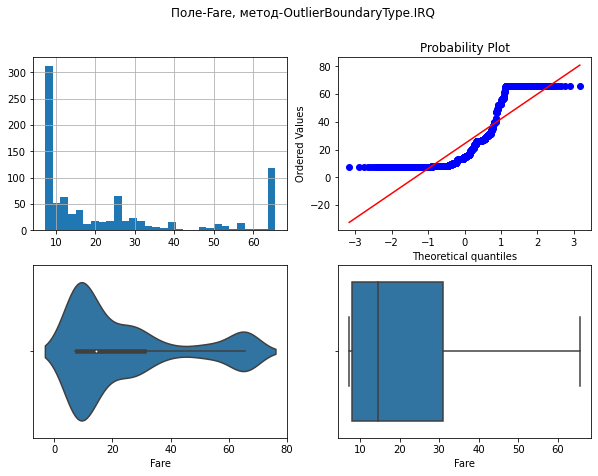

In [57]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

## Обучение моделей с различными вариантами обработки выбросов

In [58]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.1, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [59]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Survived', axis=1)

# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Survived'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_ALL.columns)
X_test_df = pd.DataFrame(X_test, columns=X_ALL.columns)

X_train_df.shape, X_test_df.shape

((712, 7), (179, 7))

In [60]:
# Список методов обработки выбросов
method_list = ['Original']

# Список наборов данных
x_train_list = [X_train_df]
y_train_list = [y_train]

In [61]:
# Удаление выбросов
for obt in OutlierBoundaryType:

    df1 = X_train_df.copy()
    df1['Survived'] = y_train
    
    # Вычисление верхней и нижней границы
    #x_col_list = ['BloodPressure', 'Glucose', 'Insulin', 'BMI']
    chlorides_lower_boundary, chlorides_upper_boundary = get_outlier_boundaries(df1, 'Fare', obt)
   # residual_sugar_lower_boundary, residual_sugar_upper_boundary = get_outlier_boundaries(df1, 'Glucose', obt)
  #  pH_lower_boundary, pH_upper_boundary = get_outlier_boundaries(df1, 'Insulin', obt)
  #  sulphates_lower_boundary, sulphates_upper_boundary = get_outlier_boundaries(df1, 'BMI', obt)
    


    # Флаги для удаления выбросов  
    outliers_RM = np.where(df1['Fare'] > chlorides_upper_boundary, True, 
                             np.where(df1['Fare'] < chlorides_lower_boundary, True, False))
    #outliers_LSTAT = np.where(df1['Glucose'] > residual_sugar_upper_boundary, True, 
    #                         np.where(df1['Glucose'] < residual_sugar_lower_boundary, True, False))
    #outliers_CRIM = np.where(df1['Insulin'] > pH_upper_boundary, True, 
    #                         np.where(df1['Insulin'] < pH_lower_boundary, True, False))
   # outliers_CRIM = np.where(df1['BMI'] > sulphates_upper_boundary, True, 
    #                         np.where(df1['BMI'] < sulphates_lower_boundary, True, False))

    # Изменение данных
    data_train_trimmed = df1.loc[~(outliers_RM ), ]
    x_data_train_trimmed = data_train_trimmed.drop('Survived', axis=1)
    y_data_train_trimmed = data_train_trimmed['Survived']
    title = '{}-trimmed'.format(obt)
    # Сохранение в списки
    method_list.append(title)
    x_train_list.append(x_data_train_trimmed)
    y_train_list.append(y_data_train_trimmed)

In [62]:
# Замена выбросов
for obt in OutlierBoundaryType:
    
    df2 = X_train_df.copy()
    
    for col in x_col_list:    
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df2, col, obt)
        # Изменение данных
        df2[col] = np.where(df2[col] > upper_boundary, upper_boundary, 
                                 np.where(df2[col] < lower_boundary, lower_boundary, df2[col]))

    title = '{}-updated'.format(obt)
    # Сохранение в списки
    method_list.append(title)
    x_train_list.append(df2)        
    y_train_list.append(y_train)

In [63]:
clas_models_dict = {'LogR': LogisticRegression(max_iter=1000), 
                    'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    'Tree':DecisionTreeClassifier(),
                    'GB': GradientBoostingClassifier(),
                    'RF':RandomForestClassifier(n_estimators=50, random_state=1, max_depth=3)}

In [64]:
def test_models(clas_models_dict, method_list, x_train_list, y_train_list, X_test, y_test):
    logger = MetricLogger()
    for model_name, model in clas_models_dict.items():
        for name, (x_data, y_data) in zip(method_list, zip(x_train_list, y_train_list)):
            model.fit(x_data, y_data)
            y_pred = model.predict(X_test)
            mse = roc_auc_score(y_test, y_pred)
            logger.add(model_name, name, mse)
    return logger

In [65]:
%%time
logger = test_models(clas_models_dict, method_list, x_train_list, y_train_list, X_test, y_test)

Wall time: 2.79 s


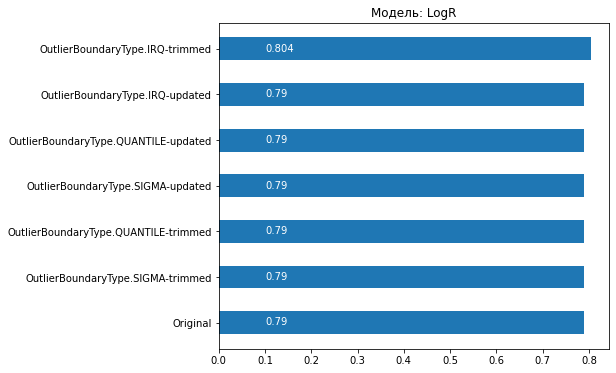

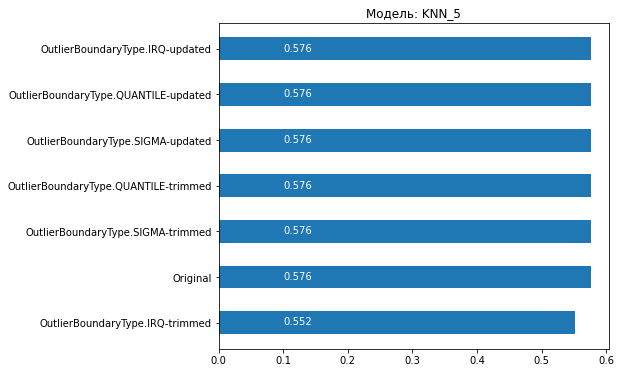

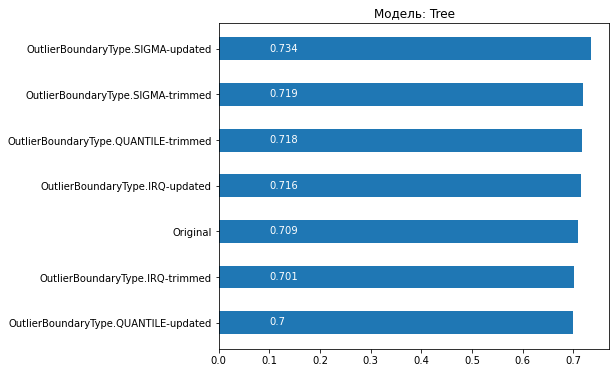

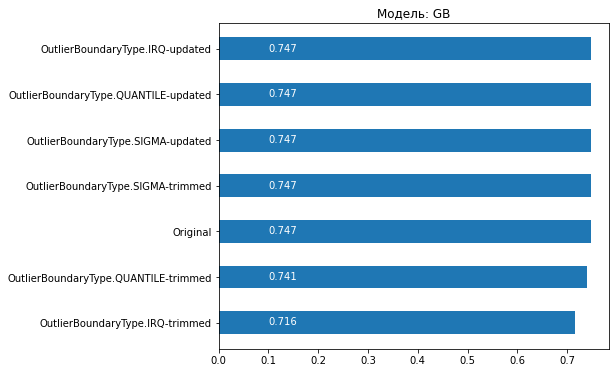

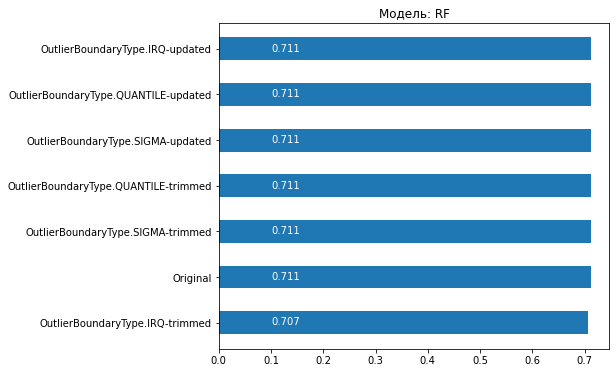

In [66]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 6))

# 3. обработкa  нестандартного признака

In [67]:
data = pd.read_csv("C:\\Users\\ksenv\\Desktop\\DatasetAtts.csv",nrows = 1000)

In [68]:
data.shape

(1000, 87)

In [69]:
data.drop(data.columns.difference(['Source.IP','Timestamp']),axis=1,inplace=True)
 

In [70]:
data.head()

,Source.IP,Timestamp
0,172.19.1.46,26/04/201711:11:17
1,10.200.7.7,26/04/201711:11:17
2,50.31.185.39,26/04/201711:11:17
3,50.31.185.39,26/04/201711:11:17
4,192.168.72.43,26/04/201711:11:17


### Обработка даты и времени

In [71]:
# Сконвертируем дату и время в нужный формат
data['Timestamp'] = data.apply(lambda x: pd.to_datetime(x['Timestamp'], format='%d/%m/%Y%H:%M:%S'), axis=1)

In [72]:
data.head()

,Source.IP,Timestamp
0,172.19.1.46,2017-04-26 11:11:17
1,10.200.7.7,2017-04-26 11:11:17
2,50.31.185.39,2017-04-26 11:11:17
3,50.31.185.39,2017-04-26 11:11:17
4,192.168.72.43,2017-04-26 11:11:17


In [73]:
# День
data['day'] = data['Timestamp'].dt.day
# Месяц
data['month'] = data['Timestamp'].dt.month
# Год
data['year'] = data['Timestamp'].dt.year
# Часы
data['hour'] = data['Timestamp'].dt.hour
#Минуты
data['minute'] = data['Timestamp'].dt.minute
#Секунды
data['second'] = data['Timestamp'].dt.second
#Неделя года
data['week'] = data['Timestamp'].dt.isocalendar().week
#Квартал
data['quarter'] = data['Timestamp'].dt.quarter
#День недели 
data['dayofweek'] = data['Timestamp'].dt.dayofweek
#Выходной день
data['day_name'] = data['Timestamp'].dt.day_name()
data['is_holiday'] = data.apply(lambda x: 1 if x['Timestamp'].dayofweek in [5,6] else 0, axis=1)

In [74]:
data.head()

,Source.IP,Timestamp,day,month,year,hour,minute,second,week,quarter,dayofweek,day_name,is_holiday
0,172.19.1.46,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,2,Wednesday,0
1,10.200.7.7,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,2,Wednesday,0
2,50.31.185.39,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,2,Wednesday,0
3,50.31.185.39,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,2,Wednesday,0
4,192.168.72.43,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,2,Wednesday,0


#### Отображение на круг

In [75]:
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

In [76]:
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
# Опеределим периоды для признаков
for f in dt_features:
    print(f, data[f].min(), data[f].max())

year 2017 2017
day 26 26
month 4 4
hour 11 11
minute 11 11
second 17 23
week 17 17
quarter 2 2
dayofweek 2 2


In [77]:
# периоды для признаков
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]

In [78]:
dt_features_round = []

In [79]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    data[f_cos] = data.apply(lambda x: round_code(x[f], p), axis=1)
    data[f_sin] = data.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round  

Wall time: 361 ms


['day_cos',
 'day_sin',
 'month_cos',
 'month_sin',
 'hour_cos',
 'hour_sin',
 'minute_cos',
 'minute_sin',
 'second_cos',
 'second_sin',
 'week_cos',
 'week_sin',
 'quarter_cos',
 'quarter_sin',
 'dayofweek_cos',
 'dayofweek_sin']

In [80]:
data.head()

,Source.IP,Timestamp,day,month,year,hour,minute,second,week,quarter,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,172.19.1.46,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,0.406737,0.913545,-0.207912,0.978148,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928
1,10.200.7.7,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,0.406737,0.913545,-0.207912,0.978148,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928
2,50.31.185.39,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,0.406737,0.913545,-0.207912,0.978148,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928
3,50.31.185.39,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,0.406737,0.913545,-0.207912,0.978148,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928
4,192.168.72.43,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,0.406737,0.913545,-0.207912,0.978148,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928


In [81]:
def ip_code(ip, level):
    arr = ip.split('.')
    if level > 4:
        level=4
    if level == 1:
        return arr[0]
    else:
        return '_'.join(arr[:level])

In [82]:
ip_features = []
for i in range(4):
    f = str('ip_' + str(i+1))
    data[f] = data.apply(lambda x: ip_code(x['Source.IP'], i+1), axis=1)
    ip_features.append(f)
ip_features    

['ip_1', 'ip_2', 'ip_3', 'ip_4']

In [83]:
data.head()

,Source.IP,Timestamp,day,month,year,hour,minute,second,week,quarter,...,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin,ip_1,ip_2,ip_3,ip_4
0,172.19.1.46,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928,172,172_19,172_19_1,172_19_1_46
1,10.200.7.7,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928,10,10_200,10_200_7,10_200_7_7
2,50.31.185.39,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928,50,50_31,50_31_185,50_31_185_39
3,50.31.185.39,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928,50,50_31,50_31_185,50_31_185_39
4,192.168.72.43,2017-04-26 11:11:17,26,4,2017,11,11,17,17,2,...,-0.464723,0.885456,-1.0,1.224647e-16,-0.222521,0.974928,192,192_168,192_168_72,192_168_72_43


# 4. отбор признаков

In [84]:
data = pd.read_csv("C:\\Users\\ksenv\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [85]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [86]:
# типы колонок
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])   
data['OverTime'] = le.fit_transform(data['OverTime'])

### методов фильтрации (filter methods);

In [88]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [89]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','StockOptionLevel'], axis="columns", inplace=True)

In [90]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,4,1,...,13,3,3,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,3,0,...,20,4,1,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,4,1,...,22,4,2,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,4,1,...,21,4,2,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,3,1,...,13,3,2,17,3,2,7,7,7,7


In [91]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [92]:
make_corr_df(data)

,f1,f2,corr
0,MonthlyIncome,JobLevel,0.9503
1,JobLevel,MonthlyIncome,0.9503


In [93]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [94]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['JobLevel', 'MonthlyIncome']]

<AxesSubplot:>

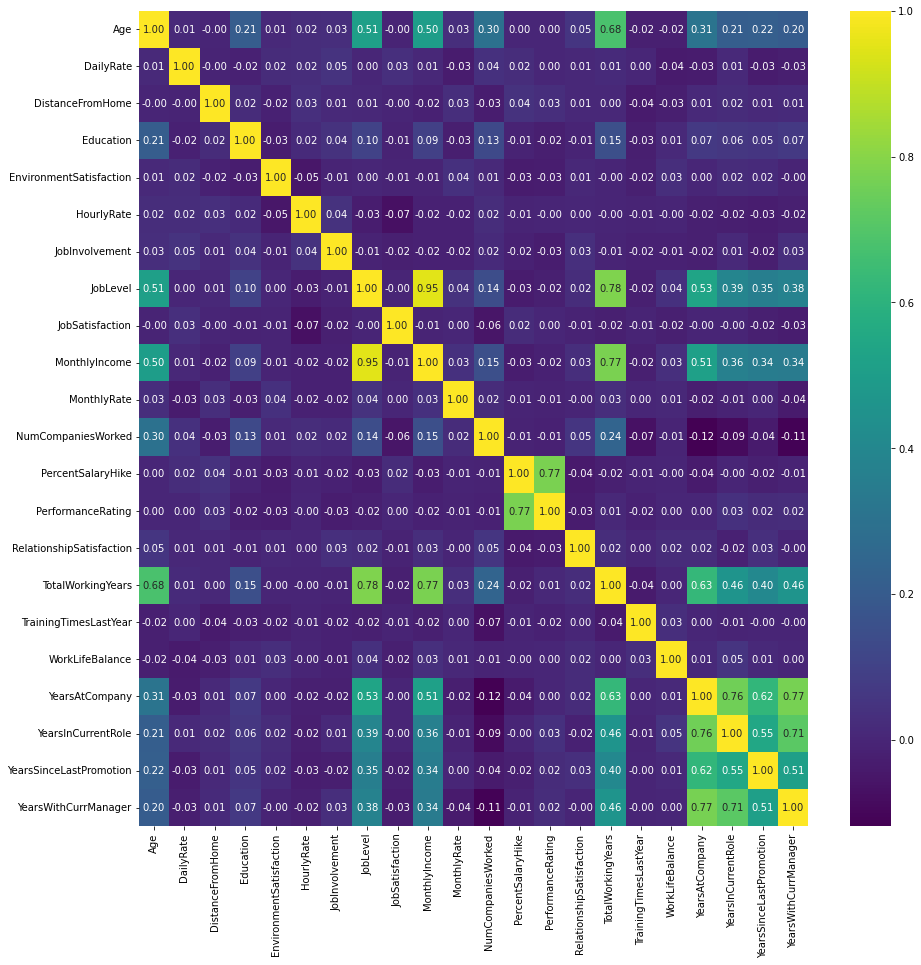

In [95]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

In [96]:
X=data.drop(['Attrition'],axis=1)
Y=data['Attrition']

In [97]:
feature_names = X.columns

In [98]:
sel_mi = SelectKBest(mutual_info_classif, k=5).fit(X, Y)

list(zip(feature_names, sel_mi.get_support()))

[('Age', True),
 ('BusinessTravel', False),
 ('DailyRate', False),
 ('Department', False),
 ('DistanceFromHome', False),
 ('Education', False),
 ('EducationField', False),
 ('EnvironmentSatisfaction', True),
 ('Gender', False),
 ('HourlyRate', False),
 ('JobInvolvement', False),
 ('JobLevel', True),
 ('JobRole', True),
 ('JobSatisfaction', False),
 ('MaritalStatus', False),
 ('MonthlyIncome', True),
 ('MonthlyRate', False),
 ('NumCompaniesWorked', False),
 ('OverTime', False),
 ('PercentSalaryHike', False),
 ('PerformanceRating', False),
 ('RelationshipSatisfaction', False),
 ('TotalWorkingYears', False),
 ('TrainingTimesLastYear', False),
 ('WorkLifeBalance', False),
 ('YearsAtCompany', False),
 ('YearsInCurrentRole', False),
 ('YearsSinceLastPromotion', False),
 ('YearsWithCurrManager', False)]

In [99]:
feature_names[sel_mi.get_support()]

Index(['Age', 'EnvironmentSatisfaction', 'JobLevel', 'JobRole',
       'MonthlyIncome'],
      dtype='object')

### методов обертывания (wrapper methods);

In [100]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [101]:
'''efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, Y, custom_feature_names=feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)'''

"efs1 = EFS(knn, \n           min_features=2,\n           max_features=4,\n           scoring='accuracy',\n           print_progress=True,\n           cv=5)\n\nefs1 = efs1.fit(X, Y, custom_feature_names=feature_names)\n\nprint('Best accuracy score: %.2f' % efs1.best_score_)\nprint('Best subset (indices):', efs1.best_idx_)\nprint('Best subset (corresponding names):', efs1.best_feature_names_)"

In [102]:
efs2 = EFS(knn, 
           min_features=2,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(X, Y, custom_feature_names=feature_names)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 406/406

Best accuracy score: 0.84
Best subset (indices): (3, 20)
Best subset (corresponding names): ('Department', 'PerformanceRating')


### методов вложений (embedded methods).

In [103]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X, Y)
# Коэффициенты регрессии
e_lr1.coef_

array([[-2.86926458e-02,  1.48928722e-02, -3.07310293e-04,
         7.56979786e-01,  3.58695682e-02,  2.07679153e-02,
         6.20345166e-02, -3.88551447e-01,  3.63191455e-01,
        -1.23340660e-03, -4.87120950e-01, -3.28584875e-01,
        -7.26590178e-02, -3.82206175e-01,  7.27248268e-01,
        -4.70747136e-05,  7.90371175e-06,  1.70544813e-01,
         1.80044830e+00, -5.11689849e-02,  4.13906028e-01,
        -2.14705859e-01, -5.00037855e-02, -1.52135141e-01,
        -2.76077090e-01,  9.53175689e-02, -1.44590410e-01,
         1.55978244e-01, -1.35245009e-01]])

In [104]:
from sklearn.feature_selection import SelectFromModel

In [105]:
# Все 4 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X, Y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [106]:
from sklearn.svm import LinearSVC

In [107]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X, Y)
# Коэффициенты регрессии
e_lr2.coef_

array([[-8.27447853e-03,  0.00000000e+00, -8.13116307e-05,
         0.00000000e+00,  7.62637442e-03,  0.00000000e+00,
         0.00000000e+00, -5.21966356e-02,  0.00000000e+00,
        -1.10644672e-04, -5.76046342e-02,  0.00000000e+00,
         6.93784756e-03, -4.66256929e-02,  9.48945062e-02,
        -1.85688127e-05,  1.63784455e-06,  2.55884380e-02,
         2.68006080e-01,  0.00000000e+00,  0.00000000e+00,
        -4.79428215e-03, -3.62582362e-03, -7.76005412e-03,
         0.00000000e+00,  4.11469495e-03, -1.95491913e-02,
         2.51423867e-02, -1.74135392e-02]])

In [108]:
# Признак 4 исключен
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X, Y)
sel_e_lr2.get_support()

array([ True, False,  True, False,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True])

In [109]:
list(zip(feature_names, sel_e_lr2.get_support()))

[('Age', True),
 ('BusinessTravel', False),
 ('DailyRate', True),
 ('Department', False),
 ('DistanceFromHome', True),
 ('Education', False),
 ('EducationField', False),
 ('EnvironmentSatisfaction', True),
 ('Gender', False),
 ('HourlyRate', True),
 ('JobInvolvement', True),
 ('JobLevel', False),
 ('JobRole', True),
 ('JobSatisfaction', True),
 ('MaritalStatus', True),
 ('MonthlyIncome', True),
 ('MonthlyRate', False),
 ('NumCompaniesWorked', True),
 ('OverTime', True),
 ('PercentSalaryHike', False),
 ('PerformanceRating', False),
 ('RelationshipSatisfaction', True),
 ('TotalWorkingYears', True),
 ('TrainingTimesLastYear', True),
 ('WorkLifeBalance', False),
 ('YearsAtCompany', True),
 ('YearsInCurrentRole', True),
 ('YearsSinceLastPromotion', True),
 ('YearsWithCurrManager', True)]

In [110]:
feature_names[sel_e_lr2.get_support()]

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [111]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(X, Y)
rfc1.fit(X, Y)
gbc1.fit(X, Y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.06954332, 0.00628805, 0.0553554 , 0.        , 0.02864022,
        0.01725105, 0.00922247, 0.02112186, 0.00886315, 0.07912951,
        0.02793173, 0.00335363, 0.03523387, 0.04302374, 0.03070662,
        0.1249844 , 0.06375513, 0.04601251, 0.06057407, 0.02899212,
        0.        , 0.02379785, 0.05569237, 0.04153813, 0.01713056,
        0.01288389, 0.03727389, 0.03555209, 0.01614836]),
 1.0000000000000002)

In [112]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(23,10)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.003, str(round(b,3)))
    plt.show()
    return labels, data

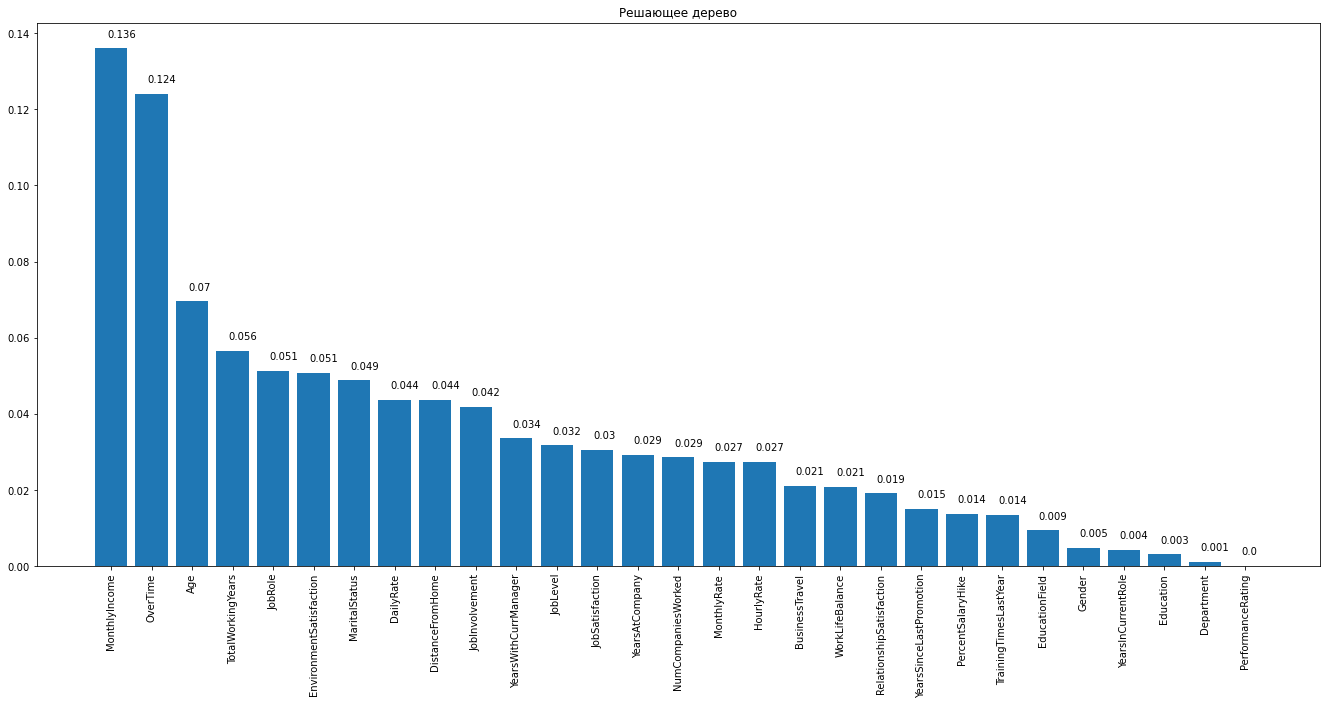

In [113]:
_,_=draw_feature_importances(gbc1  , X, 'Решающее дерево')